In [1]:
import pandas as pd
import numpy as np

In [2]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [3]:
# decisiontree 시각화
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names= iris_data.target_names,
feature_names = iris_data.feature_names, impurity =True, filled = True)

In [4]:
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

Feature impotances:\m[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


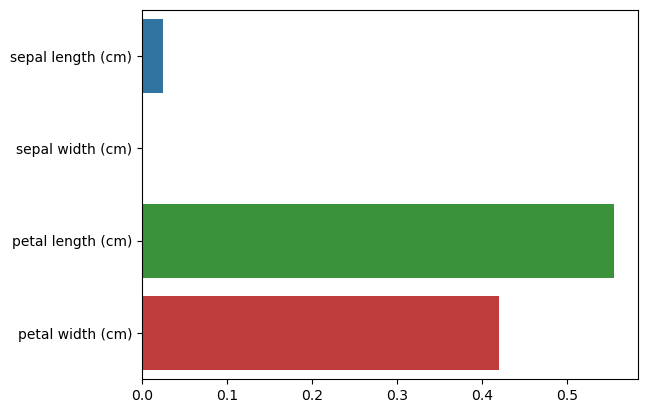

In [5]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature impotances:\m{0}". format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'. format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

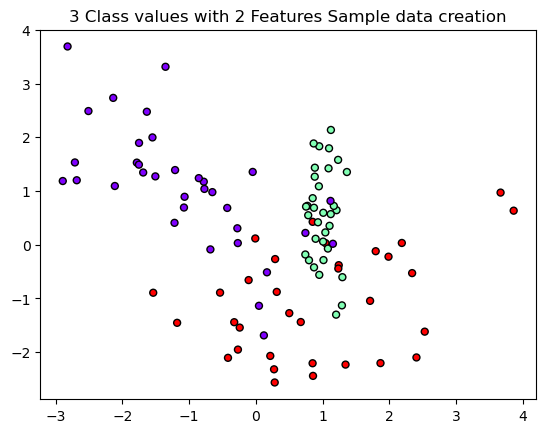

In [27]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# make_classification 가상의 분류모델 데이터를 생성해주는 함수 
# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
n_classes=3, n_clusters_per_class=1, random_state=0)

# scatter 파라미터 marker : 모양 , S(size) = 크기, cmap :파라미터에 컬러맵에 해당하는 문자열을 지정 c:클래스 
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

# make_classification
n_samples : 표본 데이터의 수, 디폴트 100

n_features : 독립 변수의 수, 디폴트 20

n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2

n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2

n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0

n_classes : 종속 변수의 클래스 수, 디폴트 2

n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2

weights : 각 클래스에 할당된 표본 수

random_state : 난수 발생 시드

반환값:

X : [n_samples, n_features] 크기의 배열

독립 변수

y : [n_samples] 크기의 배열

종속 변수

In [32]:
from sklearn.metrics import accuracy_score

def visualize_boundary(model, X,y):
    fig,ax = plt.subplots()

    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k',clim=(y.min(),y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    model.fit(X,y)
    
    xx,yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy, Z, alpha=0.3, levels=np.arange(n_classes+1)-0.5, clim=(y.min(),y.max()), zorder=1)
 

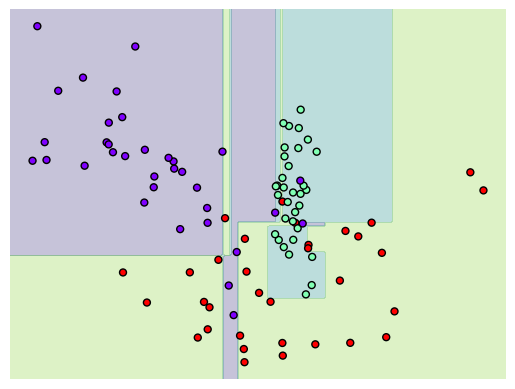

In [33]:
# 과적합 가능성
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

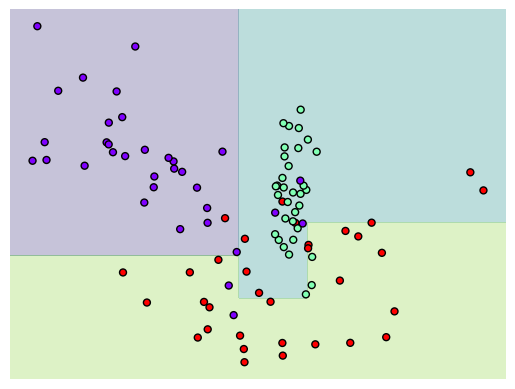

In [34]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)